<a href="https://colab.research.google.com/github/KieranJP/Neural-Network-Binary-Classifier/blob/master/Deep_Neural_Network_Binary_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This allows me to upload the csv files used as the training and the test data fom my PC:**

In [0]:
#Uploading Test Data
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving FullELFFDataset.csv to FullELFFDataset.csv
User uploaded file "FullELFFDataset.csv" with length 14744861 bytes


In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import keras as K

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

#Imports Required
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#Selecting the Csv to use then Displaying it
import pandas as pd
dataset = pd.read_csv("FullELFFDataset.csv")

#Using sklearn's split function to split the data into training and testing data.
from sklearn.model_selection import train_test_split

X = dataset.values #drop defectives
Y = dataset.Defective.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

X_gridtrain, X_gridtest, Y_gridtrain, Y_gridtest = train_test_split(X_train,Y_train, test_size=0.4)

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

#Attempt at creating a Grid Search to optimise hyperparamter

def create_model(batch=64, epoch=500, optimizer='adam', learn_rate=0.01, activation='relu'):
  model = Sequential()
  model.add(K.layers.Dense(units=40, input_dim=40, activation='relu', kernel_initializer='truncated_normal')) 
  model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal')) 
  model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal'))
  model.add(K.layers.Dense(units=1, activation='sigmoid', kernel_initializer='truncated_normal'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
  return model

In [0]:
hparamsBatch = [64, 128]
hparamsEpoch = [250, 500, 1000]
hparamsLR = [0.000001, 0.00001, 0.0001, 0.001, 0.01]

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

#Defining the Range
param_grid = dict(batch_size=hparamsBatch,
                  epochs=hparamsEpoch,
                  learn_rate=hparamsLR)

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3,
                    scoring='accuracy',
                    verbose=10)
grid_result = grid.fit(X_gridtest, Y_gridtest)

# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
#Creates a NN
model = Sequential()
#Input Layer
model.add(K.layers.Dense(units=40, input_dim=40, activation='relu', kernel_initializer='truncated_normal')) 
#Hidden Layers
model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal')) 
model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal'))
#Output Layers
model.add(K.layers.Dense(units=1, activation='sigmoid', kernel_initializer='truncated_normal'))

simple_sgd = K.optimizers.Adam(lr=0.00001)  
model.compile(loss='binary_crossentropy', optimizer=simple_sgd, metrics=['accuracy']) 

In [0]:
#Find out the size of each class so can change weighting
trueWeight = len(Y_train[Y_train==False])
falseWeight = len(Y_train[Y_train==True])

history = model.fit(X_train, Y_train, batch_size=128, epochs=1000, validation_split=0.2)

Train on 54924 samples, validate on 13732 samples
Epoch 1/1000
54924/54924 [==============================] - 2s 39us/step - loss: 0.6977 - acc: 0.9502 - val_loss: 0.6044 - val_acc: 0.9498
Epoch 2/1000
54924/54924 [==============================] - 1s 23us/step - loss: 0.5695 - acc: 0.9488 - val_loss: 0.5230 - val_acc: 0.9498
Epoch 3/1000
54924/54924 [==============================] - 1s 24us/step - loss: 0.4534 - acc: 0.9489 - val_loss: 0.3908 - val_acc: 0.9498
Epoch 4/1000
54924/54924 [==============================] - 1s 24us/step - loss: 0.3450 - acc: 0.9489 - val_loss: 0.3154 - val_acc: 0.9496
Epoch 5/1000
54924/54924 [==============================] - 1s 23us/step - loss: 0.2978 - acc: 0.9491 - val_loss: 0.2844 - val_acc: 0.9496
Epoch 6/1000
54924/54924 [==============================] - 1s 24us/step - loss: 0.2734 - acc: 0.9472 - val_loss: 0.2637 - val_acc: 0.9496
Epoch 7/1000
54924/54924 [==============================] - 1s 23us/step - loss: 0.2545 - acc: 0.9492 - val_loss: 0.

[[27982     0]
 [  105  1337]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     27982
        True       1.00      0.93      0.96      1442

    accuracy                           1.00     29424
   macro avg       1.00      0.96      0.98     29424
weighted avg       1.00      1.00      1.00     29424



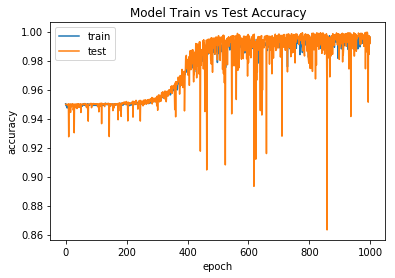

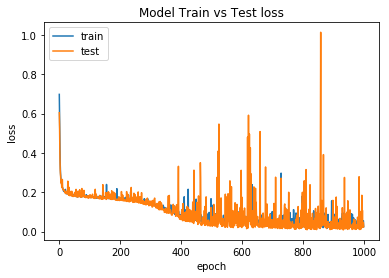

In [0]:
Y_predict = model.predict(X_test)
Y_predict =(Y_predict>0.5)
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Model Train vs Test Accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model Train vs Test loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [0]:
#Test a set of data not seen before, and with no classification to emulate user input
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
import pandas as pd  
userdata = pd.read_csv("TestUserDataFalse (5).csv")

userdata_X = userdata.values
userdata_y = userdata.Defective.values

Saving TestUserDataFalse.csv to TestUserDataFalse (5).csv
User uploaded file "TestUserDataFalse.csv" with length 394 bytes


In [0]:
user_predict = model.predict(userdata_X)
user_predict =(user_predict>0.5)
print(confusion_matrix(userdata_y, user_predict))
print(classification_report(userdata_y, user_predict))

[[1]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

